<a href="https://colab.research.google.com/github/andrewbowen19/CUNY-SQLBridge/blob/main/notebooks/bowen_chap09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and Simulation in Python

Chapter 9

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
!pip install --q pint
!pip install --q modsimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from sympy import *

# Set up Jupyter notebook to display math.
init_printing()

The following displays SymPy expressions and provides the option of showing results in LaTeX format.

In [3]:
from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.

    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

### Analysis with SymPy

Create a symbol for time.

In [4]:
t = symbols('t')

t

If you combine symbols and numbers, you get symbolic expressions.

In [5]:
expr = t + 1

t + 1

The result is an `Add` object, which just represents the sum without trying to compute it.

In [6]:
type(expr)

sympy.core.add.Add

`subs` can be used to replace a symbol with a number, which allows the addition to proceed.

In [7]:
expr.subs(t, 2)

3

`f` is a special class of symbol that represents a function.

In [8]:
f = Function('f')

f

The type of `f` is `UndefinedFunction`

In [9]:
type(f)

sympy.core.function.UndefinedFunction

SymPy understands that `f(t)` means `f` evaluated at `t`, but it doesn't try to evaluate it yet.

In [10]:
f(t)

f(t)

`diff` returns a `Derivative` object that represents the time derivative of `f`

In [11]:
dfdt = diff(f(t), t)

d       
──(f(t))
dt      

In [12]:
type(dfdt)

sympy.core.function.Derivative

We need a symbol for `alpha`

In [13]:
alpha = symbols('alpha')

α

Now we can write the differential equation for proportional growth.

In [14]:
eq1 = Eq(dfdt, alpha*f(t))

d                
──(f(t)) = α⋅f(t)
dt               

And use `dsolve` to solve it.  The result is the general solution.

In [15]:
solution_eq = dsolve(eq1)

           α⋅t
f(t) = C₁⋅ℯ   

We can tell it's a general solution because it contains an unspecified constant, `C1`.

In this example, finding the particular solution is easy: we just replace `C1` with `p_0`

In [16]:
C1, p_0 = symbols('C1 p_0')

In [17]:
particular = solution_eq.subs(C1, p_0)

           α⋅t
f(t) = p₀⋅ℯ   

In the next example, we have to work a little harder to find the particular solution.

### Solving the quadratic growth equation

We'll use the (r, K) parameterization, so we'll need two more symbols:

In [18]:
r, K = symbols('r K')

Now we can write the differential equation.

In [19]:
eq2 = Eq(diff(f(t), t), r * f(t) * (1 - f(t)/K))

d            ⎛    f(t)⎞     
──(f(t)) = r⋅⎜1 - ────⎟⋅f(t)
dt           ⎝     K  ⎠     

And solve it.

In [20]:
solution_eq = dsolve(eq2)

           C₁⋅K + r⋅t 
        K⋅ℯ           
f(t) = ───────────────
        C₁⋅K + r⋅t    
       ℯ           - 1

The result, `solution_eq`, contains `rhs`, which is the right-hand side of the solution.

In [21]:
general = solution_eq.rhs

    C₁⋅K + r⋅t 
 K⋅ℯ           
───────────────
 C₁⋅K + r⋅t    
ℯ           - 1

We can evaluate the right-hand side at $t=0$

In [22]:
at_0 = general.subs(t, 0)

    C₁⋅K 
 K⋅ℯ     
─────────
 C₁⋅K    
ℯ     - 1

Now we want to find the value of `C1` that makes `f(0) = p_0`.

So we'll create the equation `at_0 = p_0` and solve for `C1`.  Because this is just an algebraic identity, not a differential equation, we use `solve`, not `dsolve`.

The result from `solve` is a list of solutions.  In this case, [we have reason to expect only one solution](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), but we still get a list, so we have to use the bracket operator, `[0]`, to select the first one.

In [23]:
solutions = solve(Eq(at_0, p_0), C1)
type(solutions), len(solutions)

(list, 1)

In [24]:
value_of_C1 = solutions[0]

   ⎛ -p₀  ⎞
log⎜──────⎟
   ⎝K - p₀⎠
───────────
     K     

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

In [25]:
particular = general.subs(C1, value_of_C1)

             r⋅t        
      -K⋅p₀⋅ℯ           
────────────────────────
         ⎛      r⋅t    ⎞
         ⎜  p₀⋅ℯ       ⎟
(K - p₀)⋅⎜- ─────── - 1⎟
         ⎝   K - p₀    ⎠

The result is complicated, but SymPy provides a method that tries to simplify it.

In [26]:
particular = simplify(particular)

         r⋅t    
   K⋅p₀⋅ℯ       
────────────────
        r⋅t     
K + p₀⋅ℯ    - p₀

Often simplicity is in the eye of the beholder, but that's about as simple as this expression gets.

Just to double-check, we can evaluate it at `t=0` and confirm that we get `p_0`

In [27]:
particular.subs(t, 0)

p₀

This solution is called the [logistic function](https://en.wikipedia.org/wiki/Population_growth#Logistic_equation).

In some places you'll see it written in a different form:

$f(t) = \frac{K}{1 + A e^{-rt}}$

where $A = (K - p_0) / p_0$.

We can use SymPy to confirm that these two forms are equivalent.  First we represent the alternative version of the logistic function:

In [28]:
A = (K - p_0) / p_0

K - p₀
──────
  p₀  

In [29]:
logistic = K / (1 + A * exp(-r*t))

        K         
──────────────────
              -r⋅t
    (K - p₀)⋅ℯ    
1 + ──────────────
          p₀      

To see whether two expressions are equivalent, we can check whether their difference simplifies to 0.

In [30]:
simplify(particular - logistic)

0

This test only works one way: if SymPy says the difference reduces to 0, the expressions are definitely equivalent (and not just numerically close).

But if SymPy can't find a way to simplify the result to 0, that doesn't necessarily mean there isn't one.  Testing whether two expressions are equivalent is a surprisingly hard problem; in fact, there is no algorithm that can solve it in general.

### Exercises

**Exercise:** Solve the quadratic growth equation using the alternative parameterization

$\frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $

In [31]:
# Solution goes here
alpha = symbols("alpha")
beta = symbols("beta")

β

In [32]:
# We can use the f(t) already defined
eq = Eq(diff(f(t), t), alpha*f(t) + beta*f(t)**2)

d                      2   
──(f(t)) = α⋅f(t) + β⋅f (t)
dt                         

In [33]:
# Using dsolve from sympy
soln = dsolve(eq)

             α⋅(C₁ + t)   
          α⋅ℯ             
f(t) = ───────────────────
         ⎛     α⋅(C₁ + t)⎞
       β⋅⎝1 - ℯ          ⎠

In [34]:
# Get the general solution from the right-hand side of our solution above
general_soln = soln.rhs

      α⋅(C₁ + t)   
   α⋅ℯ             
───────────────────
  ⎛     α⋅(C₁ + t)⎞
β⋅⎝1 - ℯ          ⎠

In [35]:
# Solution goes here
initial = general_soln.subs(t, 0)

      C₁⋅α   
   α⋅ℯ       
─────────────
  ⎛     C₁⋅α⎞
β⋅⎝1 - ℯ    ⎠

In [36]:
# Using the p_0 and C1 symbols from previously
solutions = solve(Eq(initial, p_0), C1)

⎡   ⎛  β⋅p₀  ⎞⎤
⎢log⎜────────⎟⎥
⎢   ⎝α + β⋅p₀⎠⎥
⎢─────────────⎥
⎣      α      ⎦

In [37]:
# Solution goes here

**Exercise:**  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using either or both forms of parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

or

    df(t) / dt = r f(t) (1 - f(t)/K)

Find the general solution and also the particular solution where `f(0) = p_0`.

I was able to plug in the first equation version into WolframAlpha, getting the [following general solution](https://www.wolframalpha.com/input?i=df%28t%29+%2F+dt+%3D+alpha+f%28t%29+%2B+beta+f%28t%29%5E2), which matches the general solution above








My particular solution plugged into WolframAlpha was this: 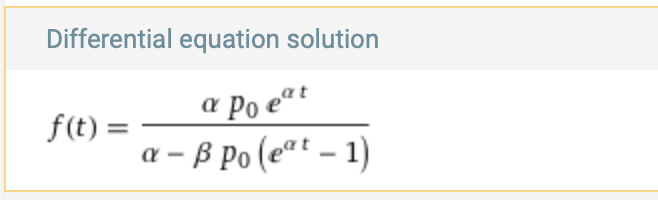,

Which looks to be a re-written version of our particular solution in `solutions`